In [4]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


In [5]:
from sklearn.datasets import load_iris
iris = load_iris() # iris 데이터 셋 로드

- DESCR : 데이터셋의 정보를 보여줌
- data : feature data
- feature_names : feature data의 컬럼 이름
- target : label data (수치형)
- target_names : label의 이름 (문자형)

In [31]:
print(iris['DESCR']) #describe의 약자로, 데이터에 대한 정보를 모두 보여줌

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- sepal : 꽃 받침
- petal : 꽃잎

In [9]:
target = iris['target'] #target -> label
target[:5]

array([0, 0, 0, 0, 0])

In [10]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 데이터 프레임 만들기 

In [11]:
df_iris = pd.DataFrame(data, columns=feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df_iris['target'] = target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 시각화

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

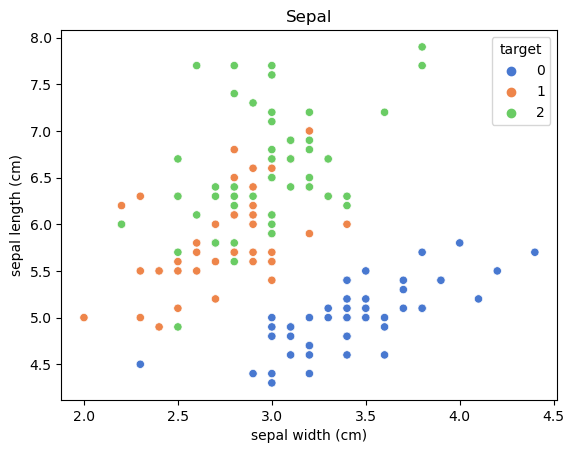

In [14]:
sns.scatterplot('sepal width (cm)', 'sepal length (cm)',hue='target',palette='muted',data=df_iris)
plt.title('Sepal')
plt.show()

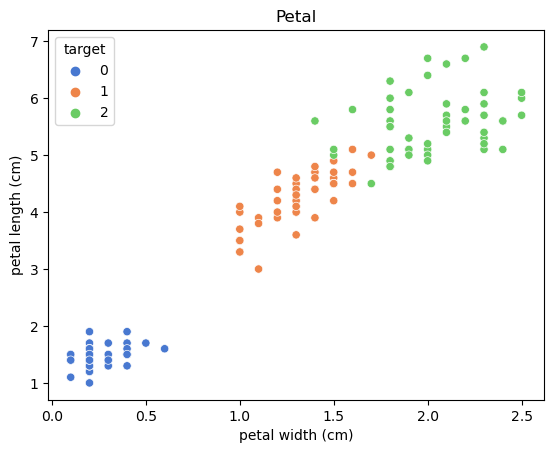

In [15]:
sns.scatterplot('petal width (cm)', 'petal length (cm)',hue='target',palette='muted',data=df_iris)
plt.title('Petal')
plt.show()

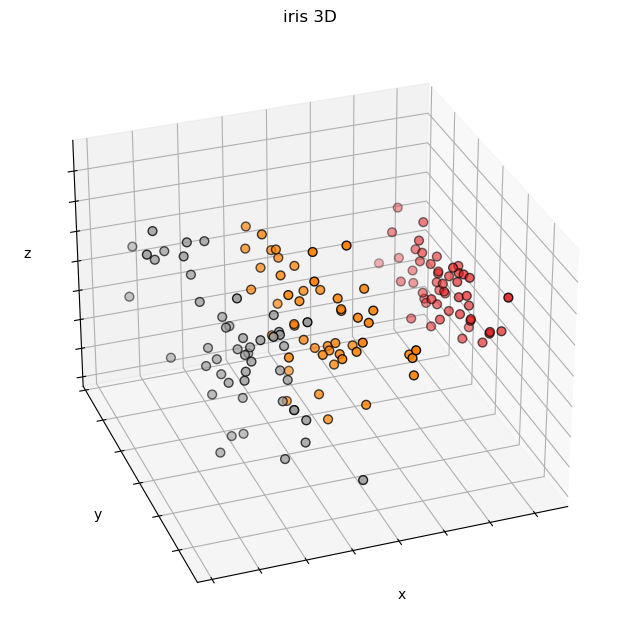

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target',1))
ax.scatter(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2], c=df_iris['target'],
          cmap=plt.cm.Set1, edgecolor='k',s=40)

ax.set_title("iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1),df_iris['target'])

In [23]:
x_train.shape,y_train.shape

((112, 4), (112,))

In [24]:
x_valid.shape,y_valid.shape

((38, 4), (38,))

<AxesSubplot:xlabel='target', ylabel='count'>

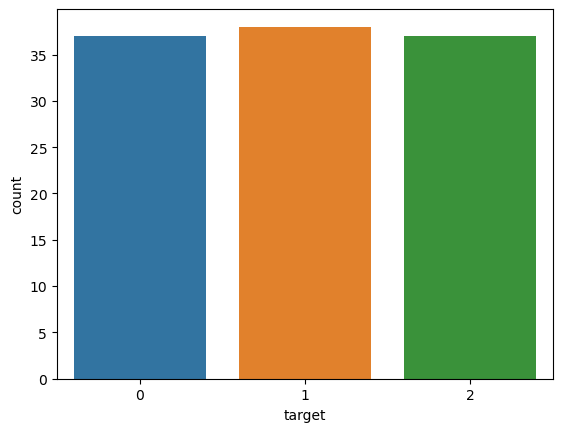

In [25]:
sns.countplot(y_train)

**stratify**: label의 클래스의 분포를 균등하게 배분 

<AxesSubplot:xlabel='target', ylabel='count'>

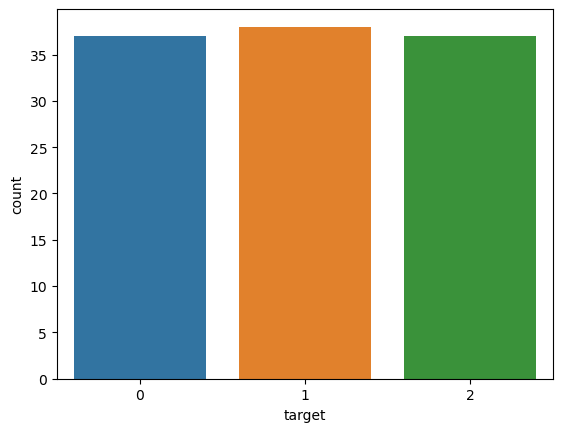

In [27]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1),
                                                      df_iris['target'], 
                                                      stratify=df_iris['target'])
sns.countplot(y_train)

In [28]:
x_train.shape,y_train.shape

((112, 4), (112,))

In [29]:
x_valid.shape,y_valid.shape

((38, 4), (38,))

# Logistic Regression

- 독립 변수의 선형 결합을 이용해 사건의 발생 가능성을 예측하는데 사용되는 통계 기법
- 서포트 벡터 머신(SVM)과 같은 알고리즘은 이진분류만 가능함(2개의 클래스 판별만 가능)
- 3개 이상의 클래스에 대한 판별을 진행하는 경우
    - one-vs-rest(OvR)
        - k개의 클래스가 존재할때, 1개의 클래스를 제외한 다른 클래스를 k개 만들어 각각의 이진분류에 대한 확률을 구하고, 총합을 통해 최종클래스 판별 
    - one-vs-one(OvO) 
        - 4개의 계절을 구분하는 클래스가 존재한다고 가정했을 때, Ovs1, Ovs2, ... 2vs3까지 NX(N-1)/2개의 분류기를 만들어 가장 많이 양성으로 선택된 클래스를 판별 (대부분 OvsR전략을 선호)


In [33]:
from sklearn.linear_model import LogisticRegression

### step1: 모델 선언

In [34]:
model = LogisticRegression()

### step2: 모델 학습

In [35]:
model.fit(x_train, y_train)

LogisticRegression()

### step3: 예측

In [38]:
prediction = model.predict(x_valid)
prediction[:5]

array([1, 0, 1, 1, 2])

### step4: 평가

In [40]:
(prediction == y_valid).mean()

0.9473684210526315

# SGDClassifier
- SGD(stochastic gradient descent) : 확률적 경사 하강법

In [41]:
from IPython.display import Image
Image()

In [42]:
from sklearn.linear_model import SGDClassifier

### step1: 모델 선언 

In [44]:
sgd = SGDClassifier(random_state=0)

### step2: 모델 학습

In [45]:
sgd.fit(x_train,y_train)

SGDClassifier(random_state=0)

### step3: 예측

In [48]:
prediction = sgd.predict(x_valid)

### step4: 평가

In [47]:
(prediction == y_valid).mean()

0.9473684210526315

# 하이퍼 파라미터(hpyer-parameter) 튜닝

각 알고리즘 별 hyper-parameter의 종류가 다양함
모두 다 외워서 할 수 는 없으나 문서를 보고 적절한 가서를 세운 다음 적용하면서 검증해야 함

- random_stat : 하이퍼 파라미터 튜닝시 고정해야함
- n_jobs=-1 : CPU를 모두 사용(학습 속도가 빠름)

In [58]:
sgd = SGDClassifier(penalty='l1', random_state=0,n_jobs=-1) #l1 => L사용

In [59]:
sgd.fit(x_train,y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=0)

In [62]:
prediction = sgd.predict(x_valid)
(prediction == y_valid).mean()

0.9473684210526315

# KNeighborsClassifier
- 최근접 이웃 알고리즘

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knc =KNeighborsClassifier()
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [66]:
knc_pred = knc.predict(x_valid)
(knc_pred == y_valid).mean()

0.9736842105263158

In [67]:
knc = KNeighborsClassifier(n_neighbors=9)
knc.fit(x_train, y_train)
knc_pred = knc.predict(x_valid)
(knc_pred == y_valid).mean()

0.9210526315789473

# 서포트 벡터 머신(SVC)
- 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류모델을 만듦
- 경게로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘
- 로지스틱 회귀와 같이 이진분류만 가능(=2개의 클래스 판별만 가능)

# OvsR 전략 사용

In [71]:
from sklearn.svm import SVC

svc = SVC(random_state=0,)
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_valid)

svc

SVC(random_state=0)

In [72]:
(svc_pred == y_valid).mean()

0.9210526315789473

In [73]:
svc_pred[:5]

array([1, 0, 1, 1, 2])

# decision_function()
### : 각 클래스 별 확률값을 return해줌

In [76]:
svc.decision_function(x_valid)[:5]

array([[-0.22429869,  2.22253598,  1.0154604 ],
       [ 2.22268581,  1.18080495, -0.25392959],
       [-0.21041006,  2.23890693,  0.84998127],
       [-0.22234379,  2.23754814,  0.89239166],
       [-0.2418793 ,  1.06707251,  2.23508934]])

# 의사결정나무(Decision Tree)
- 스무고개처럼, 나무 가지치기를 통해 소그룹으로 나누어 판별

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtc =DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [81]:
dtc_pred = dtc.predict(x_valid)
(dtc_pred == y_valid).mean()

0.9473684210526315

# 오차(Error)
### 정확도의 함정

In [82]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

- 유방암 환자 데이터 셋을 로드
- **target** : 0=악성종양, 1=양성종양

In [84]:
cancer = load_breast_cancer()
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [85]:
data = cancer['data']
target = cancer['target']
feature_names = cancer['feature_names']

In [88]:
# 데이터 프레임 생성
df = pd.DataFrame(data=data, columns = feature_names)
df['target']=cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [91]:
pos = df.loc[df['target']==1]
neg = df.loc[df['target']==0]

pos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


양성환자 357개 + 악성환자 5개

In [93]:
sample = pd.concat([pos, neg[:5]],sort=True)

In [94]:
x_train, x_test, y_train, y_test = train_test_split(sample.drop('target',1),
                                                   sample['target'],
                                                   random_state=42)

- 모델을 정의하고 학습

In [95]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)

(pred == y_test).mean()

0.978021978021978

In [96]:
my_prediction = np.ones(shape=y_test.shape)
(my_prediction == y_test).mean()

0.989010989010989

정확도만 놓고 보면 무조건 음성환자로 예측하는 분류기가 성능이 가장 좋음
하지만 무조건 음성환자로 예측해서 예측율을 98.9%로 말하는 것은 바람직하지 않음

따라서 정확도(accuracy)만 보고 분류기의 성능을 판별하는 것은 위와 같은 오류에 빠질 수 있으므로 다른 지표들도 함께 보고 파악해야 함 

# 오차행렬(Confusion maxtix)

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[ 1,  0],
       [ 2, 88]], dtype=int64)

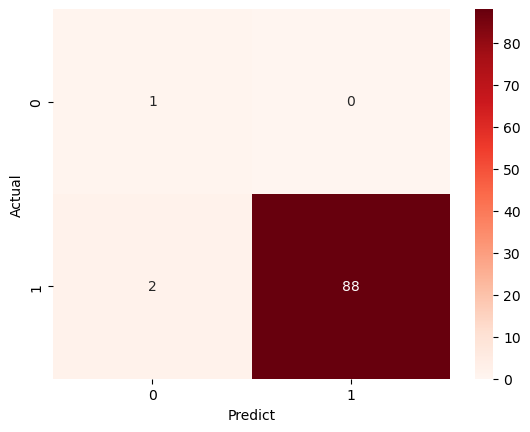

In [100]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Reds',)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

# 정밀도(precision)

- 양성 예측 정확도
- TP / (TP+FP)

In [102]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, pred)

1.0

- 무조건 **양성**으로만 판단하면 좋은 정밀도를 얻기 때문에 유용하지 않음

# 재현율(recall)


- 정확하게 감지한 양성 샘플의 비율로 민감도(sensitivity)라고 불리기도 함
- TP / (TP+FN)

In [104]:
recall_score(y_test, pred)

0.9777777777777777

# F1 score

- 정밀도와 재현율의 조화평균을 나타내는 지표

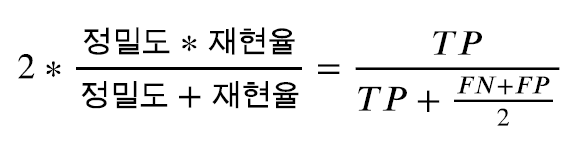

In [106]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.9887640449438202